In [0]:
##Import Library inti yang dibutuhkan
# library untuk data processing
import pandas as pd
# library untuk proses array
import numpy as np
# library untuk visualisasi data
import seaborn as sns
import matplotlib.pyplot as plt




# Pre processing data sebelum di training

In [2]:
##Membaca data frame dan menempatkannya pada variabel df

df = pd.read_csv("titanic.csv", delimiter=",")
## Menampilkan data frame untuk 5 baris pertama
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
## Melihat jumlah baris dan kolom pada dataframe
df.shape

(891, 12)

In [4]:
## Mengecek apakah ada nilai null pada dataframe
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [5]:
##proses mengecek nilai total missing value

total = df.isnull().sum().sort_values(ascending=False)

total


Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [0]:
##Membuang variabel cabin karena memiliki null yang cukup banyak
df.drop('Cabin', axis=1, inplace=True)
##Membuang variabel yang tidak berkaitan
df.drop(['Name', 'PassengerId', 'Ticket'], axis=1, inplace=True)


Karena Kolom Embarked memiliki nilai null yang sedikit yaitu 2 maka bisa kita nilai null dengan nilai modus pada kolom embarked

In [7]:
#Mengisi nilai null pada embarked
## Mengisi nilai null 
mmodus = ['Embarked']
for feature in mmodus:
        if feature in df.columns.values:
            df[feature] = df[feature].fillna(df[feature].value_counts().index[0])

df.isnull().sum()


Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

Karena kolom age merupakan variabel penting dan memiliki nilai null kurang dari 50% maka nilai null pada kolom age bisa diisi dengan nilai rata-rata(mean) pada kolom tersebut.

In [9]:
## Mengisi nilai null pada kolom Age
mmean = ['Age']
for feature in mmean:
        if feature in df.columns.values:
            df[feature] = df[feature].fillna(df[feature].mean())
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [11]:
##Mengecek type nilai untuk setiap variabel
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


Karena masih ada nilai yang berupa object maka perlu kita numerisasi

In [16]:
## import library untuk pre processing
from sklearn.preprocessing import Imputer, StandardScaler, LabelEncoder

#Numerisasi kolom Sex dan Embarked
numerisasi = ['Sex','Embarked']
for feature in numerisasi:
        if feature in df.columns.values:
            df[feature] = LabelEncoder().fit_transform(df[feature])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null int64
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff8926e8f98>,
      dtype=object)

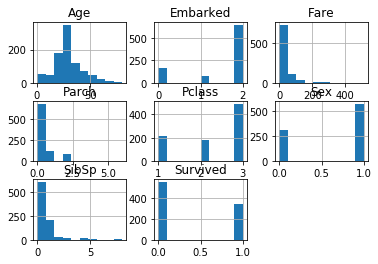

In [42]:
## Memvisualisasi data untuk setiap variabel
df.hist()

In [27]:
from sklearn.model_selection import train_test_split

#MENENTUKAN VARIABEL X DAN Y
X=df.drop('Survived',axis=1)
Y=df['Survived']

#Mensplit data train dan data test
X_train,X_test,y_train,y_test=train_test_split(X,Y, test_size=0.2, random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(712, 7)
(179, 7)
(712,)
(179,)


In [0]:
# Import library untuk KNN
from sklearn.neighbors import KNeighborsClassifier

#K Nearest Neighbor:
knn = KNeighborsClassifier(n_neighbors = 2) 
knn.fit(X_train, y_train)  
y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_train, y_train) * 100, 2)

In [32]:
##Mengetest model KNN yang sudah ditrain
yhat = knn.predict(X_test)
yhat[0:5]

array([0, 0, 0, 0, 0])

In [43]:
##Mengecek Nilai Akurasi Model dengan confusion metric
from sklearn import metrics

prediction = knn.predict(X_train)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, prediction))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))
print(metrics.confusion_matrix(y_test, yhat))
print(metrics.classification_report(y_test, yhat))

Train set Accuracy:  0.8384831460674157
Test set Accuracy:  0.7094972067039106
[[103   7]
 [ 45  24]]
              precision    recall  f1-score   support

           0       0.70      0.94      0.80       110
           1       0.77      0.35      0.48        69

    accuracy                           0.71       179
   macro avg       0.74      0.64      0.64       179
weighted avg       0.73      0.71      0.68       179

